Topic:        Challenge Set 1

Subject:      Explore MTA turnstile data

Date:         08/20/2017

Name:         Brendan Fitzpatrick

Worked with:  Alexei Demochouk

In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
import dateutil
from datetime import datetime as dt

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Benson Challenges

Note: Challenges can be solved using pandas or python dictionaries.


#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [5]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [11]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271


In [12]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

In [13]:
# Challenge 1
turnstiles_df['keys'] = turnstiles_df[['C/A', 'UNIT', 'SCP', 'STATION']].values.tolist()
turnstiles_df['values'] = turnstiles_df[['LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']].values.tolist()
turnstiles_df['keys'] = [tuple(x) for x in turnstiles_df['keys'].values]

In [14]:
d = defaultdict(list)
for key, value in zip(turnstiles_df['keys'], turnstiles_df['values']):
    d[key].append(value)

#### Challenge 2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields
in each list. You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [15]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,keys,values
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,"(A002, R051, 02-00-00, 59 ST)","[NQR456, BMT, 08/27/2016, 00:00:00, REGULAR, 5..."
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,"(A002, R051, 02-00-00, 59 ST)","[NQR456, BMT, 08/27/2016, 04:00:00, REGULAR, 5..."
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,"(A002, R051, 02-00-00, 59 ST)","[NQR456, BMT, 08/27/2016, 08:00:00, REGULAR, 5..."
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,"(A002, R051, 02-00-00, 59 ST)","[NQR456, BMT, 08/27/2016, 12:00:00, REGULAR, 5..."
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,"(A002, R051, 02-00-00, 59 ST)","[NQR456, BMT, 08/27/2016, 16:00:00, REGULAR, 5..."


In [17]:
# Check Challenge 1 and Challenge 2
check_var = ('A002','R051','02-00-00','59 ST')
print('Q1 Check: ', d[check_var][0:5])

Q1 Check:  [['NQR456', 'BMT', '08/27/2016', '00:00:00', 'REGULAR', 5799442, 1966041], ['NQR456', 'BMT', '08/27/2016', '04:00:00', 'REGULAR', 5799463, 1966044], ['NQR456', 'BMT', '08/27/2016', '08:00:00', 'REGULAR', 5799492, 1966079], ['NQR456', 'BMT', '08/27/2016', '12:00:00', 'REGULAR', 5799610, 1966155], ['NQR456', 'BMT', '08/27/2016', '16:00:00', 'REGULAR', 5799833, 1966214]]


In [18]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [19]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,keys,values,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,"(R626, R062, 00-00-00, CROWN HTS-UTICA)","[34, IRT, 08/27/2016, 00:00:00, REGULAR, 12079...",2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,"(R626, R062, 00-00-00, CROWN HTS-UTICA)","[34, IRT, 08/27/2016, 04:00:00, REGULAR, 12079...",2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,"(R626, R062, 00-00-00, CROWN HTS-UTICA)","[34, IRT, 08/27/2016, 08:00:00, REGULAR, 12079...",2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,"(R626, R062, 00-00-00, CROWN HTS-UTICA)","[34, IRT, 08/27/2016, 12:00:00, REGULAR, 12080...",2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,"(R626, R062, 00-00-00, CROWN HTS-UTICA)","[34, IRT, 08/27/2016, 16:00:00, REGULAR, 12080...",2016-08-27 16:00:00


In [20]:
# turnstiles_df = .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [21]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [22]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,keys,values,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,"(R504, R276, 00-00-01, VERNON-JACKSON)","[7, IRT, 09/16/2016, 00:00:00, REGULAR, 813791...",2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,"(R504, R276, 00-00-01, VERNON-JACKSON)","[7, IRT, 09/16/2016, 04:00:00, REGULAR, 813791...",2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,"(R504, R276, 00-00-01, VERNON-JACKSON)","[7, IRT, 09/16/2016, 08:00:00, REGULAR, 813827...",2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,"(R504, R276, 00-00-01, VERNON-JACKSON)","[7, IRT, 09/16/2016, 08:00:00, RECOVR AUD, 813...",2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,"(R504, R276, 00-00-01, VERNON-JACKSON)","[7, IRT, 09/16/2016, 12:00:00, REGULAR, 813943...",2016-09-16 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [23]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

In [24]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [25]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate Entries

In [26]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#### Challenge 3

- These counts are for every n hours. (What is n?) We want total daily
  entries.

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [27]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [28]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


In [29]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [30]:
turnstiles_daily.head(25)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5.800e+06
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5.801e+06
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5.802e+06
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5.804e+06
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5.805e+06
6,A002,R051,02-00-00,59 ST,09/02/2016,5808616,09/01/2016,5.807e+06
7,A002,R051,02-00-00,59 ST,09/03/2016,5809522,09/02/2016,5.809e+06
8,A002,R051,02-00-00,59 ST,09/04/2016,5810188,09/03/2016,5.810e+06
9,A002,R051,02-00-00,59 ST,09/05/2016,5810871,09/04/2016,5.810e+06


In [31]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [32]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [33]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(713, 8)

In [34]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,keys,values,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,"(A011, R080, 01-00-00, 57 ST-7 AV)","[NQR, BMT, 08/27/2016, 20:00:00, REGULAR, 8876...",2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,"(A011, R080, 01-00-00, 57 ST-7 AV)","[NQR, BMT, 08/27/2016, 16:00:00, REGULAR, 8876...",2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,"(A011, R080, 01-00-00, 57 ST-7 AV)","[NQR, BMT, 08/27/2016, 12:00:00, REGULAR, 8876...",2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,"(A011, R080, 01-00-00, 57 ST-7 AV)","[NQR, BMT, 08/27/2016, 08:00:00, REGULAR, 8876...",2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,"(A011, R080, 01-00-00, 57 ST-7 AV)","[NQR, BMT, 08/27/2016, 04:00:00, REGULAR, 8876...",2016-08-27 04:00:00


In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [36]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [37]:
turnstiles_daily['keys'] = turnstiles_daily[['C/A', 'UNIT', 'SCP', 'STATION']].values.tolist()
turnstiles_daily['keys'] = [tuple(x) for x in turnstiles_daily['keys'].values]
d3 = defaultdict(list)
for key, val, ent in zip(turnstiles_daily['keys'], turnstiles_daily['DATE'], turnstiles_daily['DAILY_ENTRIES']):
    d3[key].append([dateutil.parser.parse(val), ent])

#### Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)

In [38]:
mask = ((turnstiles_daily["C/A"] == "A021") & 
        (turnstiles_daily["UNIT"] == "R032") &
        (turnstiles_daily["SCP"]  == "01-00-00") &
        (turnstiles_daily["STATION"] == "TIMES SQ-42 ST"))
turnstiles_daily[mask].shape

(20, 10)

In [39]:
turnstiles_daily["DATE_TIME"] = pd.to_datetime(turnstiles_daily.DATE, format="%m/%d/%Y")

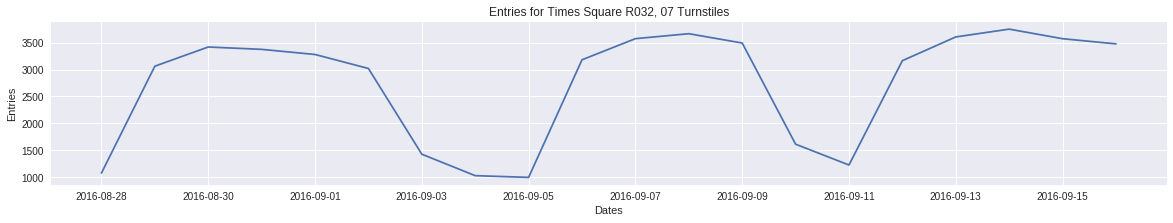

In [40]:
plt.figure(figsize=(20,3))
plt.plot(turnstiles_daily[mask].DATE_TIME,turnstiles_daily[mask].DAILY_ENTRIES)
plt.title('Entries for Times Square R032, 07 Turnstiles')
plt.xlabel('Dates')
plt.ylabel('Entries')

#### Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There
are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the
 C/A, UNIT and STATION columns, different values for the SCP column.
    
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.

In [41]:
ca_unit_stations = (turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION','DATE_TIME']).DAILY_ENTRIES.sum().reset_index())
ca_unit_stations.head(5)

,C/A,UNIT,STATION,DATE_TIME,DAILY_ENTRIES
0,A002,R051,59 ST,2016-08-28,7896.0
1,A002,R051,59 ST,2016-08-29,15462.0
2,A002,R051,59 ST,2016-08-30,16622.0
3,A002,R051,59 ST,2016-08-31,16557.0
4,A002,R051,59 ST,2016-09-01,16464.0


#### Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [42]:
stations = (turnstiles_daily.groupby(['STATION', 'DATE_TIME']).DAILY_ENTRIES.sum().reset_index())
stations.head()

,STATION,DATE_TIME,DAILY_ENTRIES
0,1 AV,2016-08-28,13871.0
1,1 AV,2016-08-29,18064.0
2,1 AV,2016-08-30,19182.0
3,1 AV,2016-08-31,19616.0
4,1 AV,2016-09-01,20170.0


#### Challenge 7

Plot the time series for a station.

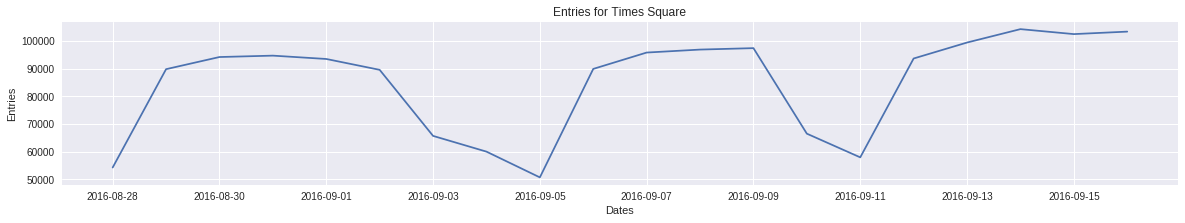

In [43]:
mask = (stations["STATION"] == "TIMES SQ-42 ST")
plt.figure(figsize=(20,3))
plt.plot(stations[mask].DATE_TIME,stations[mask].DAILY_ENTRIES)
plt.title('Entries for Times Square')
plt.xlabel('Dates')
plt.ylabel('Entries')

#### Challenge 8

Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.

In [45]:
stations['WEEK_DAY'] = stations.DATE_TIME.dt.weekday_name
stations['WEEK'] = stations.DATE_TIME.dt.week       
stations.head(10)       

,STATION,DATE_TIME,DAILY_ENTRIES,WEEK_DAY,WEEK
0,1 AV,2016-08-28,13871.0,Sunday,34
1,1 AV,2016-08-29,18064.0,Monday,35
2,1 AV,2016-08-30,19182.0,Tuesday,35
3,1 AV,2016-08-31,19616.0,Wednesday,35
4,1 AV,2016-09-01,20170.0,Thursday,35
5,1 AV,2016-09-02,20439.0,Friday,35
6,1 AV,2016-09-03,15187.0,Saturday,35
7,1 AV,2016-09-04,12951.0,Sunday,35
8,1 AV,2016-09-05,11376.0,Monday,36
9,1 AV,2016-09-06,19007.0,Tuesday,36


In [46]:
day_week_35 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].WEEK_DAY)
entries_week_35 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].DAILY_ENTRIES)
day_week_34 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].WEEK_DAY)
entries_week_36 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].DAILY_ENTRIES)
day_week_36 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].WEEK_DAY)
entries_week_36 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].DAILY_ENTRIES)
day_week_37 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].WEEK_DAY)
entries_week_37 = list(stations[(stations.STATION == 'GRD CNTRL-42 ST') & (stations.WEEK == 35)].DAILY_ENTRIES)       

In [47]:
print(day_week_35)
print(entries_week_35)
print(day_week_34)
print(entries_week_36)
print(day_week_36)
print(entries_week_36)
print(day_week_37)
print(entries_week_37)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[143672.0, 152566.0, 153361.0, 153896.0, 129139.0, 58699.0, 48621.0]
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[143672.0, 152566.0, 153361.0, 153896.0, 129139.0, 58699.0, 48621.0]
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[143672.0, 152566.0, 153361.0, 153896.0, 129139.0, 58699.0, 48621.0]
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
[143672.0, 152566.0, 153361.0, 153896.0, 129139.0, 58699.0, 48621.0]


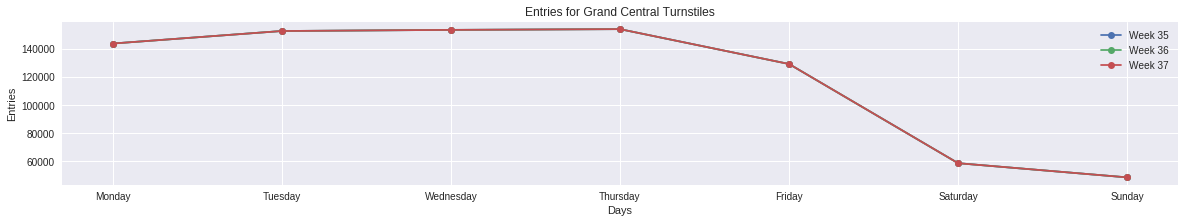

In [48]:
plt.figure(figsize=(20,3))
plt.plot(np.arange(len(day_week_35)),entries_week_35, 'o-')
plt.plot(np.arange(len(day_week_36)),entries_week_36, 'o-')
plt.plot(np.arange(len(day_week_37)),entries_week_37, 'o-')
plt.legend(['Week 35', 'Week 36', 'Week 37'], loc='upper right')
plt.title('Entries for Grand Central Turnstiles')
plt.xticks(np.arange(len(day_week_35)), day_week_35)
plt.xlabel('Days')
plt.ylabel('Entries')

#### Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [50]:
stations_total = (stations.groupby(['STATION', 'WEEK']).DAILY_ENTRIES.sum().reset_index())
stations_total.head(5)

,STATION,WEEK,DAILY_ENTRIES
0,1 AV,34,13871.0
1,1 AV,35,125609.0
2,1 AV,36,133820.0
3,1 AV,37,114788.0
4,103 ST,34,11981.0


In [51]:
stations_total = (stations.groupby('STATION')['DAILY_ENTRIES'].sum().reset_index().sort_values("DAILY_ENTRIES", ascending=False))
stations_total.head()

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2.874e+06
230,GRD CNTRL-42 ST,2.477e+06
59,34 ST-HERALD SQ,2.069e+06
46,23 ST,2.055e+06
170,CANAL ST,1.947e+06


#### Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

<Container object of 373 artists>

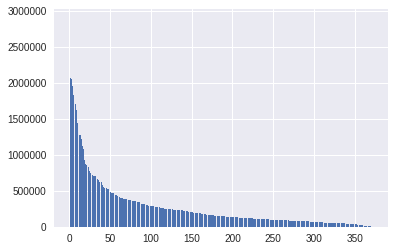

In [52]:
indices = range(len(stations_total))
plt.bar(indices, stations_total.DAILY_ENTRIES)